# Importing libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_orig= pd.read_csv('train.csv')
test_orig= pd.read_csv('test.csv')
subm= pd.read_csv('sample_submission_lfbv3c3.csv')

**Number of unique values for each column in train and test dataset**

In [59]:
for col in test_orig.columns:
    print("{}:\ntrain dataset:{}\ntest dataset:{}".format(col,train_orig[col].nunique(),test_orig[col].nunique()))
    print("=======================================")

case_id:
train dataset:318438
test dataset:137057
Hospital_code:
train dataset:32
test dataset:32
Hospital_type_code:
train dataset:7
test dataset:7
City_Code_Hospital:
train dataset:11
test dataset:11
Hospital_region_code:
train dataset:3
test dataset:3
Available Extra Rooms in Hospital:
train dataset:18
test dataset:15
Department:
train dataset:5
test dataset:5
Ward_Type:
train dataset:6
test dataset:6
Ward_Facility_Code:
train dataset:6
test dataset:6
Bed Grade:
train dataset:4
test dataset:4
patientid:
train dataset:92017
test dataset:39607
City_Code_Patient:
train dataset:37
test dataset:37
Type of Admission:
train dataset:3
test dataset:3
Severity of Illness:
train dataset:3
test dataset:3
Visitors with Patient:
train dataset:28
test dataset:27
Age:
train dataset:10
test dataset:10
Admission_Deposit:
train dataset:7300
test dataset:6609


In [4]:
test_orig.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [5]:
train_orig.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
train_orig['Admission_Deposit'].describe()

count    318438.000000
mean       4880.749392
std        1086.776254
min        1800.000000
25%        4186.000000
50%        4741.000000
75%        5409.000000
max       11008.000000
Name: Admission_Deposit, dtype: float64

In [7]:
test_orig['Admission_Deposit'].describe()

count    137057.000000
mean       4869.731097
std        1080.766723
min        1800.000000
25%        4178.000000
50%        4731.000000
75%        5398.000000
max       11920.000000
Name: Admission_Deposit, dtype: float64

In [8]:
train_orig.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [9]:
test_orig.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [10]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [11]:
print(train_orig['Stay'].unique())
print(f"\nTotal number of target values:{train_orig['Stay'].nunique()}")

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']

Total number of target values:11


**Concatenating train and test data for further inspection**

In [12]:
data= pd.concat([train_orig,test_orig],sort=False)

In [13]:
data.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null object
Available Extra Rooms in Hospital    455495 non-null int64
Department                           455495 non-null object
Ward_Type                            455495 non-null object
Ward_Facility_Code                   455495 non-null object
Bed Grade                            455347 non-null float64
patientid                            455495 non-null int64
City_Code_Patient                    448806 non-null float64
Type of Admission                    455495 non-null object
Severity of Illness                  455495 non-null object
Visitors with Patient                455495 non-null

In [15]:
for col in data.columns:
    print("{}:{}".format(col,data[col].nunique()))
    print("=======================================")
    
# Hence case_id is unique for every row

case_id:455495
Hospital_code:32
Hospital_type_code:7
City_Code_Hospital:11
Hospital_region_code:3
Available Extra Rooms in Hospital:18
Department:5
Ward_Type:6
Ward_Facility_Code:6
Bed Grade:4
patientid:131624
City_Code_Patient:37
Type of Admission:3
Severity of Illness:3
Visitors with Patient:29
Age:10
Admission_Deposit:7634
Stay:11


## Feature Preprocessing and Feature Generation

In [16]:
categorical_col=[]
for col in data.columns:
    if data[col].dtype== object and data[col].nunique()<=50:
        categorical_col.append(col)
print(categorical_col)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


In [17]:
for col in categorical_col:
    print(f"{col}:\n{data[col].value_counts()}")
    print("=======================================")

Hospital_type_code:
a    204730
b     98884
c     66147
e     35428
d     29048
f     15252
g      6006
Name: Hospital_type_code, dtype: int64
Hospital_region_code:
X    190849
Y    174707
Z     89939
Name: Hospital_region_code, dtype: int64
Department:
gynecology            356688
anesthesia             42358
radiotherapy           41033
TB & Chest disease     13751
surgery                 1665
Name: Department, dtype: int64
Ward_Type:
R    182939
Q    152046
S    111166
P      7199
T      2133
U        12
Name: Ward_Type, dtype: int64
Ward_Facility_Code:
F    161470
E     79058
D     74312
C     50279
B     50116
A     40260
Name: Ward_Facility_Code, dtype: int64
Type of Admission:
Trauma       217672
Emergency    168363
Urgent        69460
Name: Type of Admission, dtype: int64
Severity of Illness:
Moderate    251565
Minor       122735
Extreme      81195
Name: Severity of Illness, dtype: int64
Age:
41-50     91495
31-40     90420
51-60     69506
21-30     58560
71-80     50737
61-70 

In [18]:
data.groupby(['Hospital_region_code','Ward_Facility_Code']).size()

Hospital_region_code  Ward_Facility_Code
X                     E                      79058
                      F                     111791
Y                     B                      50116
                      C                      50279
                      D                      74312
Z                     A                      40260
                      F                      49679
dtype: int64

**Generating a feature for Hospital_region_code_FEAT_Ward_Facility_Code because particular ward_Facility_Code corresponds to particular Hospital_region_code**

In [19]:
data['Hospital_region_code_FEAT_Ward_Facility_Code']= data['Hospital_region_code']+'_'+data['Ward_Facility_Code']

In [20]:
data.groupby(['Hospital_type_code','Hospital_code']).size()

Hospital_type_code  Hospital_code
a                   4                 1749
                    5                 7448
                    6                29221
                    7                 1871
                    12               16170
                    13                7432
                    14               24715
                    19               30036
                    23               38220
                    24               11467
                    27               20243
                    29               16158
b                   11               24827
                    20                1962
                    26               47523
                    28               24572
c                   2                 7277
                    3                10277
                    8                 5284
                    15               13326
                    16                5244
                    21               11784
                    

**Generating a feature for Hospital_type_code_FEAT_Hospital_Code because particular Hospital_Code corresponds to particular Hospital_type_code**

In [21]:
data['Hospital_code']= data['Hospital_code'].apply(lambda x: str(x))
data['Hospital_type_code_FEAT_Hospital_code']= data['Hospital_type_code']+'_'+data['Hospital_code']
data['Hospital_code']= data['Hospital_code'].apply(lambda x: int(x))

In [22]:
data.groupby(['Hospital_type_code','Hospital_region_code']).size()

Hospital_type_code  Hospital_region_code
a                   X                       130849
                    Y                        66449
                    Z                         7432
b                   X                        24572
                    Y                        74312
c                   Z                        66147
d                   Y                        12688
                    Z                        16360
e                   X                        35428
f                   Y                        15252
g                   Y                         6006
dtype: int64

In [23]:
data['Hospital_type_code_FEAT_Hospital_region_code']= data['Hospital_type_code']+'_'+data['Hospital_region_code']

In [24]:
data.groupby(['Hospital_region_code','City_Code_Hospital']).size()

Hospital_region_code  City_Code_Hospital
X                     1                     79058
                      4                     19778
                      6                     67441
                      11                    24572
Y                     2                     74312
                      7                     50279
                      9                     37428
                      10                     7460
                      13                     5228
Z                     3                     45544
                      5                     44395
dtype: int64

In [25]:
data['City_Code_Hospital']= data['City_Code_Hospital'].apply(lambda x: str(x))
data['Hospital_region_code_FEAT_City_Code_Hospital']= data['Hospital_region_code']+'_'+data['City_Code_Hospital']
data['City_Code_Hospital']= data['City_Code_Hospital'].apply(lambda x: int(x))

In [26]:
data.groupby(['Bed Grade','Ward_Facility_Code']).size()

Bed Grade  Ward_Facility_Code
1.0        A                      2919
           B                      3809
           C                      8790
           D                      5755
           E                      5694
           F                     10600
2.0        A                     15875
           B                     20960
           C                     23911
           D                     29051
           E                     26618
           F                     60036
3.0        A                     13832
           B                     18101
           C                     12923
           D                     25251
           E                     30909
           F                     57926
4.0        A                      7634
           B                      7246
           C                      4654
           D                     14255
           E                     15837
           F                     32761
dtype: int64

In [27]:
data['Visitors with Patient'].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25, 29], dtype=int64)

In [28]:
data['City_Code_Patient'].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [29]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

**Generating a feature which tells if particular patient has visited the same hospital again.**

In [30]:
data['prev_hosp_code']= data['Hospital_code'].shift(1,axis=0)
data['prev_patientid']= data['patientid'].shift(1,axis=0)
data['prev_hosp_code'].fillna(0,inplace=True)
data['prev_patientid'].fillna(31397,inplace=True)

In [31]:
def fxy(prev_hosp_code,hosp_code,prev_patientid,patientid):
    if ((prev_patientid-patientid==0)&(prev_hosp_code-hosp_code==0))==True:
        return 1
    else:
        return 0
data['patient_visiting_consecutive']= data.apply(lambda x: fxy(x['prev_hosp_code'],x['Hospital_code'],
                                                               x['prev_patientid'],x['patientid']),axis=1)

In [32]:
data['patient_visiting_consecutive'].value_counts()

0    421439
1     34056
Name: patient_visiting_consecutive, dtype: int64

In [33]:
data.head().T

,0,1,2,3,4
case_id,1,2,3,4,5
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available Extra Rooms in Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed Grade,2,2,2,2,2


**Dropping unnecessary columns from the data**

In [34]:
data.drop(['case_id','patientid','Stay','prev_hosp_code','prev_patientid'],axis=1,inplace=True)

## Label Encoding all the Categorical Features.

In [35]:
categorical_col=[]
for col in data.columns:
    if data[col].dtype== object and data[col].nunique()<=50:
        categorical_col.append(col)
print(categorical_col)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Hospital_region_code_FEAT_Ward_Facility_Code', 'Hospital_type_code_FEAT_Hospital_code', 'Hospital_type_code_FEAT_Hospital_region_code', 'Hospital_region_code_FEAT_City_Code_Hospital']


In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [37]:
for col in categorical_col:
    data[col]= le.fit_transform(data[col])

## Imputing Missing Values

In [38]:
#Filling null values
data['City_Code_Patient'].fillna(data['City_Code_Patient'].median(),inplace=True)
data['Bed Grade'].fillna(-1,inplace=True)

In [39]:
train_new= data[:len(train_orig)]
test_new= data[len(train_orig):]

In [40]:
y_le= LabelEncoder()

y= y_le.fit_transform(train_orig['Stay'])

## Checking correlation of features with the target Column.

In [41]:
check=pd.concat([train_new,pd.DataFrame(data=y,columns=['Stay'])],axis=1)

In [42]:
check.corr()['Stay'].sort_values()

Available Extra Rooms in Hospital              -0.121120
Admission_Deposit                              -0.052077
Severity of Illness                            -0.031188
City_Code_Patient                              -0.009447
Ward_Facility_Code                             -0.004552
City_Code_Hospital                              0.006381
Hospital_region_code                            0.011905
Hospital_region_code_FEAT_City_Code_Hospital    0.011975
Hospital_region_code_FEAT_Ward_Facility_Code    0.017004
Type of Admission                               0.023617
Bed Grade                                       0.025416
Department                                      0.033287
Hospital_code                                   0.042846
Hospital_type_code                              0.058592
Hospital_type_code_FEAT_Hospital_region_code    0.058990
Hospital_type_code_FEAT_Hospital_code           0.063436
Age                                             0.094163
patient_visiting_consecutive   

In [43]:
y_le.classes_

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)

# Model Building- XGBoost

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_new, y, test_size=0.2, random_state=101)

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.0300000012, max_delta_step=0, max_depth=8,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_class=11, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.1,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method=None, validate_parameters=False, verbosity=None)

In [46]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.0300000012, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_class=11, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.1,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method=None, validate_parameters=False, verbosity=None)

In [47]:
pred= model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

## Got 43% accuracy on Validation set.

In [49]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.17      0.42      0.24      1961
           1       0.51      0.43      0.46     18159
           2       0.67      0.43      0.52     27304
           3       0.23      0.43      0.30      5981
           4       0.00      0.30      0.01        23
           5       0.50      0.42      0.45      8526
           6       0.00      0.00      0.00         3
           7       0.03      0.35      0.05       146
           8       0.19      0.39      0.26       491
           9       0.03      0.52      0.05        31
          10       0.42      0.52      0.47      1063

    accuracy                           0.43     63688
   macro avg       0.25      0.38      0.26     63688
weighted avg       0.53      0.43      0.46     63688



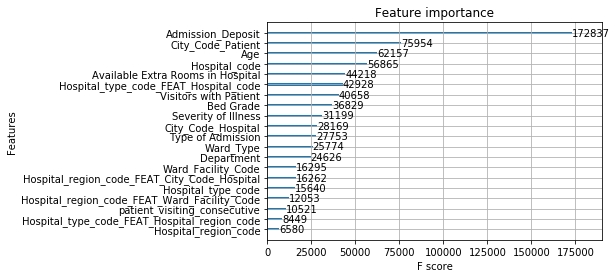

In [56]:
from xgboost import plot_importance

plot_importance(model);

## Prediction on Test set 
## Got an accuracy of 42.917% on Public leaderboard.

In [50]:
testset_pred= model.predict(test_new)

In [51]:
testset_pred= list(y_le.inverse_transform(testset_pred))

In [52]:
subm.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [53]:
final_subm= pd.DataFrame(data= testset_pred,index=subm['case_id'],columns=['Stay'])

In [54]:
final_subm.to_csv('final_subm_new.csv')

In [55]:
df= pd.read_csv('final_subm_new.csv')
df.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
